Project 3: (10 points)
your total (50 points) will divided by 5 to get 10 points for this project.


In this project, we will focus on the preprocessing step before building the model.

We will prepare data before making a Market basket analysis, which is an algorithm originally designed to help retailers understand and improve their businesses.

Also, we will do some important preprocessing step before building an unsupervised model for Customer Segments.

### Market Basket Analysis
---
Imagine you work for a retailer that sells dozens of products and your boss comes to you and asks the following questions:

* What products are purchased together most frequently?
* How should the products be organized and positioned in the store?
* How do we identify the best products to discount via coupons?
---
##### You might reasonably respond with complete bewilderment, as those questions are very diverse and do not immediately seem answerable using a single algorithm and dataset. However, the answer to all those questions and many more is market basket analysis.
--
### Dataset:
you can find the dataset on Canvas under Dataset section: "Online Retail.xlsx"

### Steps to do:

1- Open a Jupyter notebook.

2- Install the following libraries, if not installed, and then import them:
* matplotlib.pyplot, which is used to plot the results of the models.
* mlxtend.frequent_patterns, which is used to run the models;
* mlxtend.preprocessing, which is used to encode and prep the data for the models;
* numpy, which is used to work with arrays;
* pandas, which is used to work with DataFrames.

In [1]:
import matplotlib.pyplot as plt
import mlxtend.frequent_patterns
import mlxtend.preprocessing
import numpy
import pandas

3- Loading Data ( 1 point)

Load and view online retail dataset.Once you have downloaded the dataset, save it and note the path.

In [62]:
# write your code here
data = pandas.read_excel('Online Retail.xlsx')

4- Print out the first 10 rows of the DataFrame. ( 1 point)

Notice that the data contains some columns that will not be relevant to market basket analysis:

In [63]:
# write your code here
print(data.head(10))

  InvoiceNo StockCode                          Description  Quantity   
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6  \
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26

5- Print out the data type for each column in the DataFrame. (1 point)

This information will come in handy when trying to perform specific cleaning tasks. Columns need to be of the correct type in order for filtering and computing to execute as expected:

In [64]:
# write your code here
print(data.dtypes)

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


6- Get and print the dimensions of the DataFrame, as well as the number of unique invoice numbers and customer identifications (2 points)

In [65]:
# write your code here
print(data.shape)
print(data['InvoiceNo'].nunique())
print(data['CustomerID'].nunique())

(541909, 8)
25900
4372


7- Data Cleaning and Formatting:

a. Create an indicator column stipulating whether the invoice number begins with "C". Called the column "IsCPresent" ( 1 points)

In [66]:
# write your code here
IsCPresent=[ True if isinstance(a,str) else False for a in data['InvoiceNo']]
data['IsCPresent']=pandas.Series(IsCPresent)

b. (3 points)
- Filter out all transactions having either zero or a negative number of items (in other words, items were returned),
- Remove all invoice numbers starting with "C" using the column created in previous step
- Subset the DataFrame down to InvoiceNo and Description
- Drop all rows with at least one missing value.
- Rename the DataFrame online1 and print out the first 10 rows of the filtered DataFrame, online1.

In [68]:
# write your code here
data = data[data['Quantity']>0]
subset_data = data[~data['IsCPresent']]
subset_data = subset_data[['InvoiceNo', 'Description']]
#online1 = subset_data[~(subset_data[['InvoiceNo', 'Description']]== nan).any(axis=1)]
online1 = subset_data.dropna()
print(online1.head(10))

  InvoiceNo                          Description
0    536365   WHITE HANGING HEART T-LIGHT HOLDER
1    536365                  WHITE METAL LANTERN
2    536365       CREAM CUPID HEARTS COAT HANGER
3    536365  KNITTED UNION FLAG HOT WATER BOTTLE
4    536365       RED WOOLLY HOTTIE WHITE HEART.
5    536365         SET 7 BABUSHKA NESTING BOXES
6    536365    GLASS STAR FROSTED T-LIGHT HOLDER
7    536366               HAND WARMER UNION JACK
8    536366            HAND WARMER RED POLKA DOT
9    536367        ASSORTED COLOUR BIRD ORNAMENT


c. Approximately, how many rows and invoice numbers have already removed? ( 2 points)

--
### Edit to write your answer here
Almost 500 rows

In [71]:
#write your code here to prove your answer:
print(data.shape[0]-online1.shape[0])
print(data['InvoiceNo'].nunique()-online1['InvoiceNo'].nunique())

595
595


d. (2 points)
- Extract the invoice numbers from the DataFrame as a list.
- Remove duplicate elements to create a list of unique invoice numbers.
- Confirm that the process was successful by printing the length of the list of unique invoice numbers.

In [72]:
# write your code here
invoices=list(set([a for a in online1['InvoiceNo']]))
print(len(invoices))

20133


e. Take the list from step d and cut it to only include the first 5,000 elements. Print out the length of the new list to confirm that it is, in fact, the expected length of 5,000( 1 point)

In [73]:
# write your code here
invoices=invoices[0:5000]

f. Filter the online1 DataFrame down by only keeping the invoice numbers in the list from step e and print out the first 10 rows of online1( 1 point)

In [74]:
# write your code here
unique = online1[online1['InvoiceNo'].isin(invoices)]
print(unique.head(10))

  InvoiceNo                          Description
0    536365   WHITE HANGING HEART T-LIGHT HOLDER
1    536365                  WHITE METAL LANTERN
2    536365       CREAM CUPID HEARTS COAT HANGER
3    536365  KNITTED UNION FLAG HOT WATER BOTTLE
4    536365       RED WOOLLY HOTTIE WHITE HEART.
5    536365         SET 7 BABUSHKA NESTING BOXES
6    536365    GLASS STAR FROSTED T-LIGHT HOLDER
7    536366               HAND WARMER UNION JACK
8    536366            HAND WARMER RED POLKA DOT
9    536367        ASSORTED COLOUR BIRD ORNAMENT


g. Print out the dimensions of the DataFrame (online1) and the number of unique invoice numbers to confirm that the filtering and cleaning process was successful (1 point)

In [75]:
# write your code here
print(unique.shape)
print(len(invoices))

(133315, 2)
5000


h. Transform the data in online1 into the aforementioned list of lists called invoice_item_list. The process for doing this is to iterate over the unique invoice numbers and, at each iteration, extract the item descriptions as a list and append that list to the larger invoice_item_list list. Print out elements one through four of the list (2 points)

In [82]:
# write your code here
list_of_list=[]
for a in invoices:
    matching_values = unique[unique['InvoiceNo'] == a]['Description']
    list_of_list.append([b for b in matching_values])
print(list_of_list[0:3])

[['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN', 'CREAM CUPID HEARTS COAT HANGER', 'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE WHITE HEART.', 'SET 7 BABUSHKA NESTING BOXES', 'GLASS STAR FROSTED T-LIGHT HOLDER'], ['HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT'], ['ASSORTED COLOUR BIRD ORNAMENT', "POPPY'S PLAYHOUSE BEDROOM ", "POPPY'S PLAYHOUSE KITCHEN", 'FELTCRAFT PRINCESS CHARLOTTE DOLL', 'IVORY KNITTED MUG COSY ', 'BOX OF 6 ASSORTED COLOUR TEASPOONS', 'BOX OF VINTAGE JIGSAW BLOCKS ', 'BOX OF VINTAGE ALPHABET BLOCKS', 'HOME BUILDING BLOCK WORD', 'LOVE BUILDING BLOCK WORD', 'RECIPE BOX WITH METAL HEART', 'DOORMAT NEW ENGLAND']]


8- Data Encoding

While cleaning the data is crucial, the most important part of the data preparation process is molding the data into the correct form. Before running the models, the data, currently in the list of lists form, needs to be encoded and recast as a DataFrame.

To do this, we will leverage TransactionEncoder from the preprocessing module of mlxtend. The output from the encoder is a multidimensional array, where each row is the length of the total number of unique items in the transaction dataset and the elements are Boolean variables, indicating whether that particular item is linked to the invoice number that row represents. With the data encoded, we can recast it as a DataFrame where the rows are the invoice numbers and the columns are the unique items in the transaction dataset.

The data encoding will be done using mlxtend, but if you wish to encode the data without using a package, you are free.

More info about mlxtend in the link: https://rasbt.github.io/mlxtend/

a. Initialize and fit the transaction encoder. Print out an example of the resulting data. (2 points)

In [81]:
# write your code here
from mlxtend.preprocessing import TransactionEncoder
encoder = TransactionEncoder()
encoded_array = encoder.fit(list_of_list)
encoded_array = encoder.transform(list_of_list)
print(encoded_array)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


b. Recast the encoded array as a DataFrame named online_encoder_df. Print the predefined subset of the DataFrame that features both True and False values (2 points)

In [80]:
# write your code here
online_encoder_df = pandas.DataFrame(encoded_array, columns=encoder.columns_)
subset = online_encoder_df[(online_encoder_df == True).any(axis=1)

       4 PURPLE FLOCK DINNER CANDLES   OVAL WALL MIRROR DIAMANTE    
0                              False                        False  \
1                              False                        False   
2                              False                        False   
3                              False                        False   
4                              False                        False   
...                              ...                          ...   
4995                           False                        False   
4996                           False                        False   
4997                           False                        False   
4998                           False                        False   
4999                           False                        False   

       SET 2 TEA TOWELS I LOVE LONDON    SPACEBOY BABY GIFT SET   
0                                False                    False  \
1                                Fals

c. Print out the dimensions of the encoded DataFrame. It should have 5,000 rows because the data used to generate it was previously filtered down to 5,000 unique invoice numbers. (1 point)

In [14]:
# write your code here
print(online_encoder_df.shape)

(5000, 3136)


#### The data is now prepared for modeling.
---

### Wholesale Data

we will analyze a dataset containing data on various customers' annual spending amounts (reported in monetary units) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

--
### Dataset:
you can find the dataset on Canvas under Dataset section: "wholesale_customers_data.csv"

In [15]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
from numpy.random import uniform, multivariate_normal, rand, randn, seed
from itertools import repeat
from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import gridspec
from matplotlib.colors import to_rgba
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import jarque_bera, normaltest
import matplotlib.pyplot as plt
import scipy.stats as stats


1. Load the wholesale customers dataset (1 point)

In [84]:
# write your code here
df = pd.read_csv('wholesale_customers_data.csv')
print(df.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper   
0        2       3  12669  9656     7561     214              2674  \
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicatessen  
0          1338  
1          1776  
2          7844  
3          1788  
4          5185  


2. Drop Channel & Region and print the current columns ( 1 point)

In [85]:
# write your code here
df = df.drop('Channel', axis=1)
df = df.drop('Region', axis=1)
print(df.head())

   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


### Data Exploration:

You will begin exploring the data through visualizations and code to understand how each feature is related to the others.



3. Show a statistical summary for each of the above product categories. (1 point)

In [86]:
# write your code here
print(df.describe)

<bound method NDFrame.describe of      Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0    12669   9656     7561     214              2674          1338
1     7057   9810     9568    1762              3293          1776
2     6353   8808     7684    2405              3516          7844
3    13265   1196     4221    6404               507          1788
4    22615   5410     7198    3915              1777          5185
..     ...    ...      ...     ...               ...           ...
435  29703  12051    16027   13135               182          2204
436  39228   1431      764    4510                93          2346
437  14531  15488    30243     437             14841          1867
438  10290   1981     2232    1038               168          2125
439   2787   1698     2510      65               477            52

[440 rows x 6 columns]>


4. Show a visual representation of the distribution of each feature in the data.using histogram and normal probability plot. (2 points)

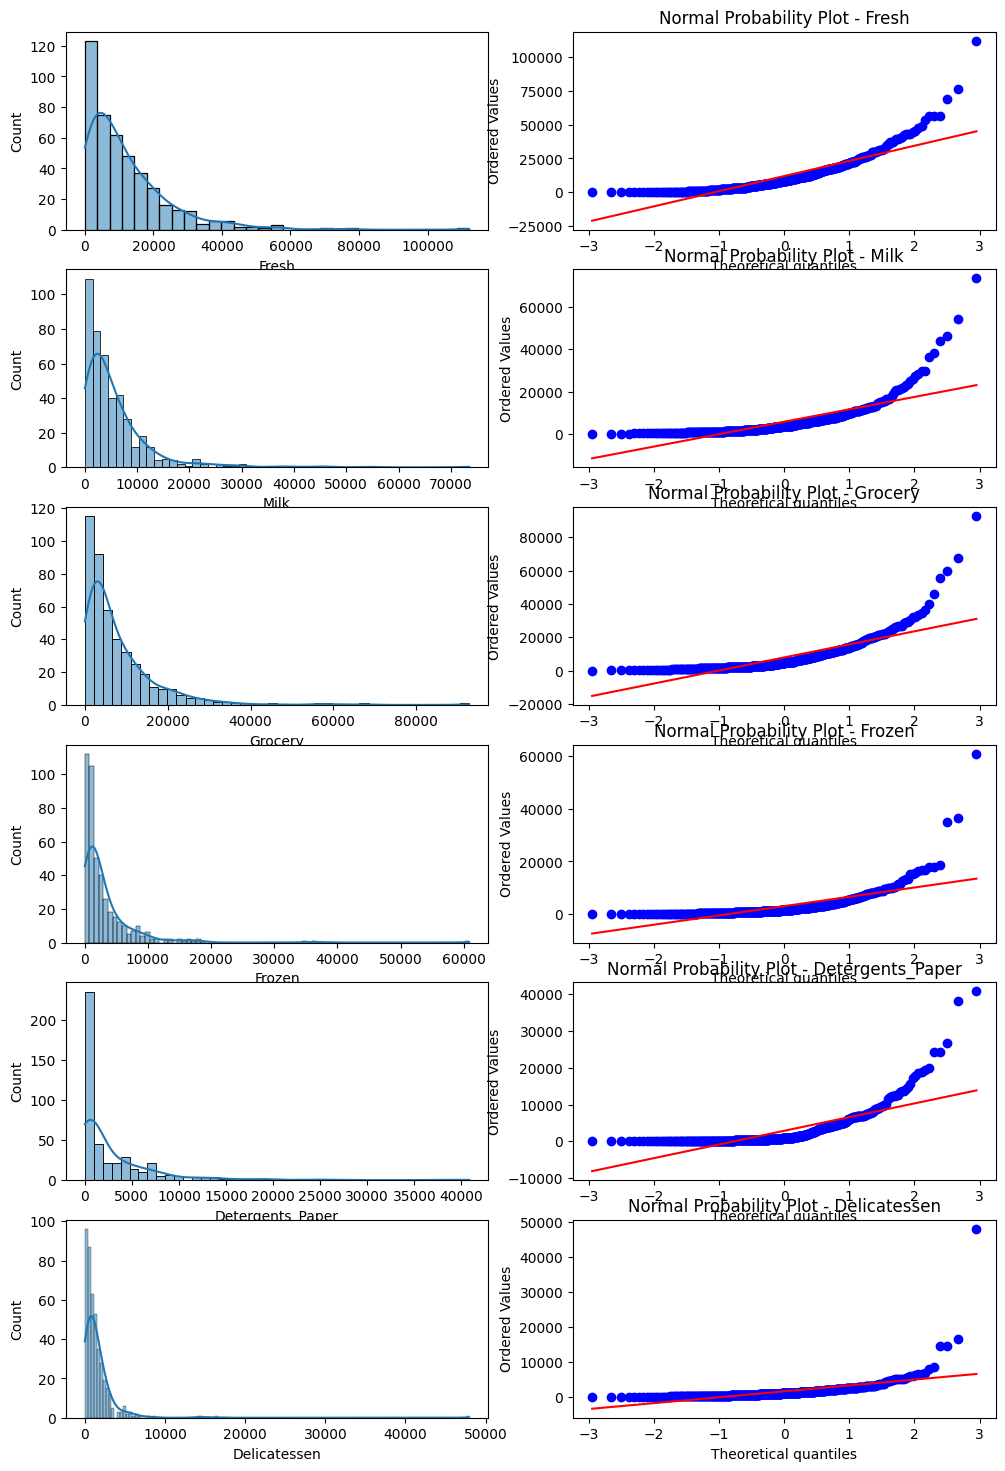

In [87]:
# write your code here
fig, axes = plt.subplots(nrows=len(df.columns), ncols=2, figsize=(12, 18))
# Loop through columns and create plots
for i, column in enumerate(df.columns):
    # Plot the histogram
    sns.histplot(df[column], kde=True, ax=axes[i][0])
    #axes[i][0].set_title(f'Histogram - {column}')
    
    # Plot the normal probability plot
    stats.probplot(df[column], plot=axes[i][1])
    axes[i][1].set_title(f'Normal Probability Plot - {column}')
plt.show()

5. What do you observe about distribution? (2 points)

From these plots we can observe that all the histograms are right-skewed which makes sense as the sales of every item should be positive. We also see that for every plot, the first bin has the highest amount of observations and the tail declines harshly soon after.

And the normal probability plots reflect these observations as all of them are right-skewed, some more than others depending on the tail of histograms.


6. Scale the sample data using the natural logarithm ( 1 point)

In [26]:
# Scale the data using the natural logarithm
scaled_df = df.apply(np.log)

7. Check for Outliers using boxplot ( 2 points)

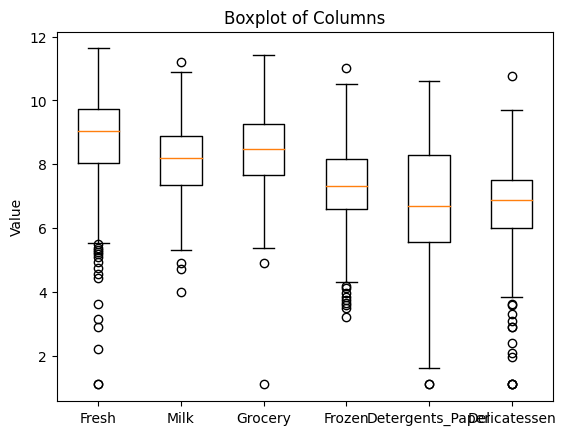

In [88]:
# write your code here
plt.boxplot(scaled_df.values)
plt.xticks(range(1, len(scaled_df.columns) + 1), scaled_df.columns)
plt.title('Boxplot of Columns')
plt.ylabel('Value')
plt.show()

8. Apply natural log to transform long tails and plot the Log Sales Distribution using violinplot (2 points)

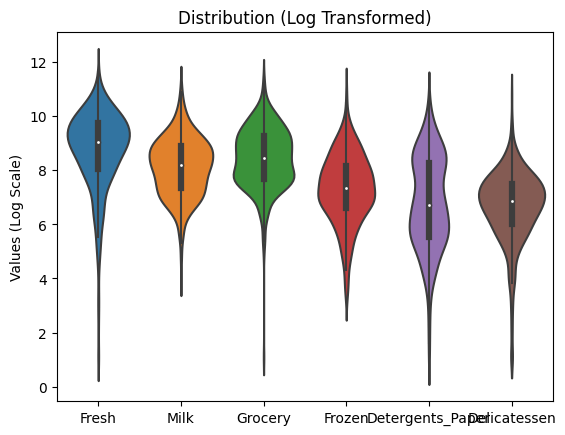

In [89]:
# write your code here
sns.violinplot(data=scaled_df)
plt.title('Distribution (Log Transformed)')
plt.ylabel('Values (Log Scale)')
plt.show()

9. Remove Outliers using LocalOutlierFactor and plot the Log Sales Distribution using violinplot after removing the outliers. (2 points)

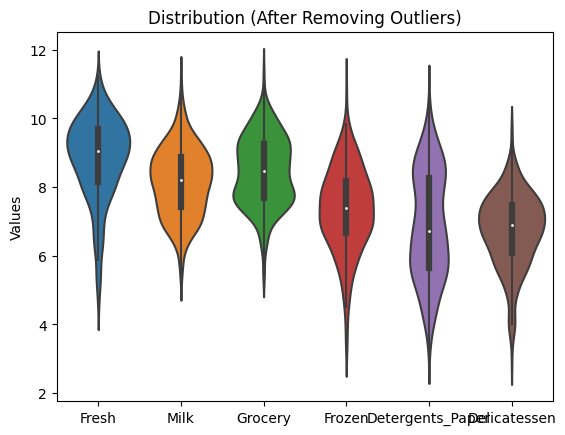

In [90]:
# write your code here
lof = LocalOutlierFactor()
outlier_scores = lof.fit_predict(scaled_df)
outliers = scaled_df[outlier_scores == -1]
df_no_outliers = scaled_df[outlier_scores != -1]
sns.violinplot(data=df_no_outliers)
plt.title('Distribution (After Removing Outliers)')
plt.ylabel('Values')
plt.show()

10. use sns.pairplot to visualize Feature Distributions in your cleaned data (2 points)

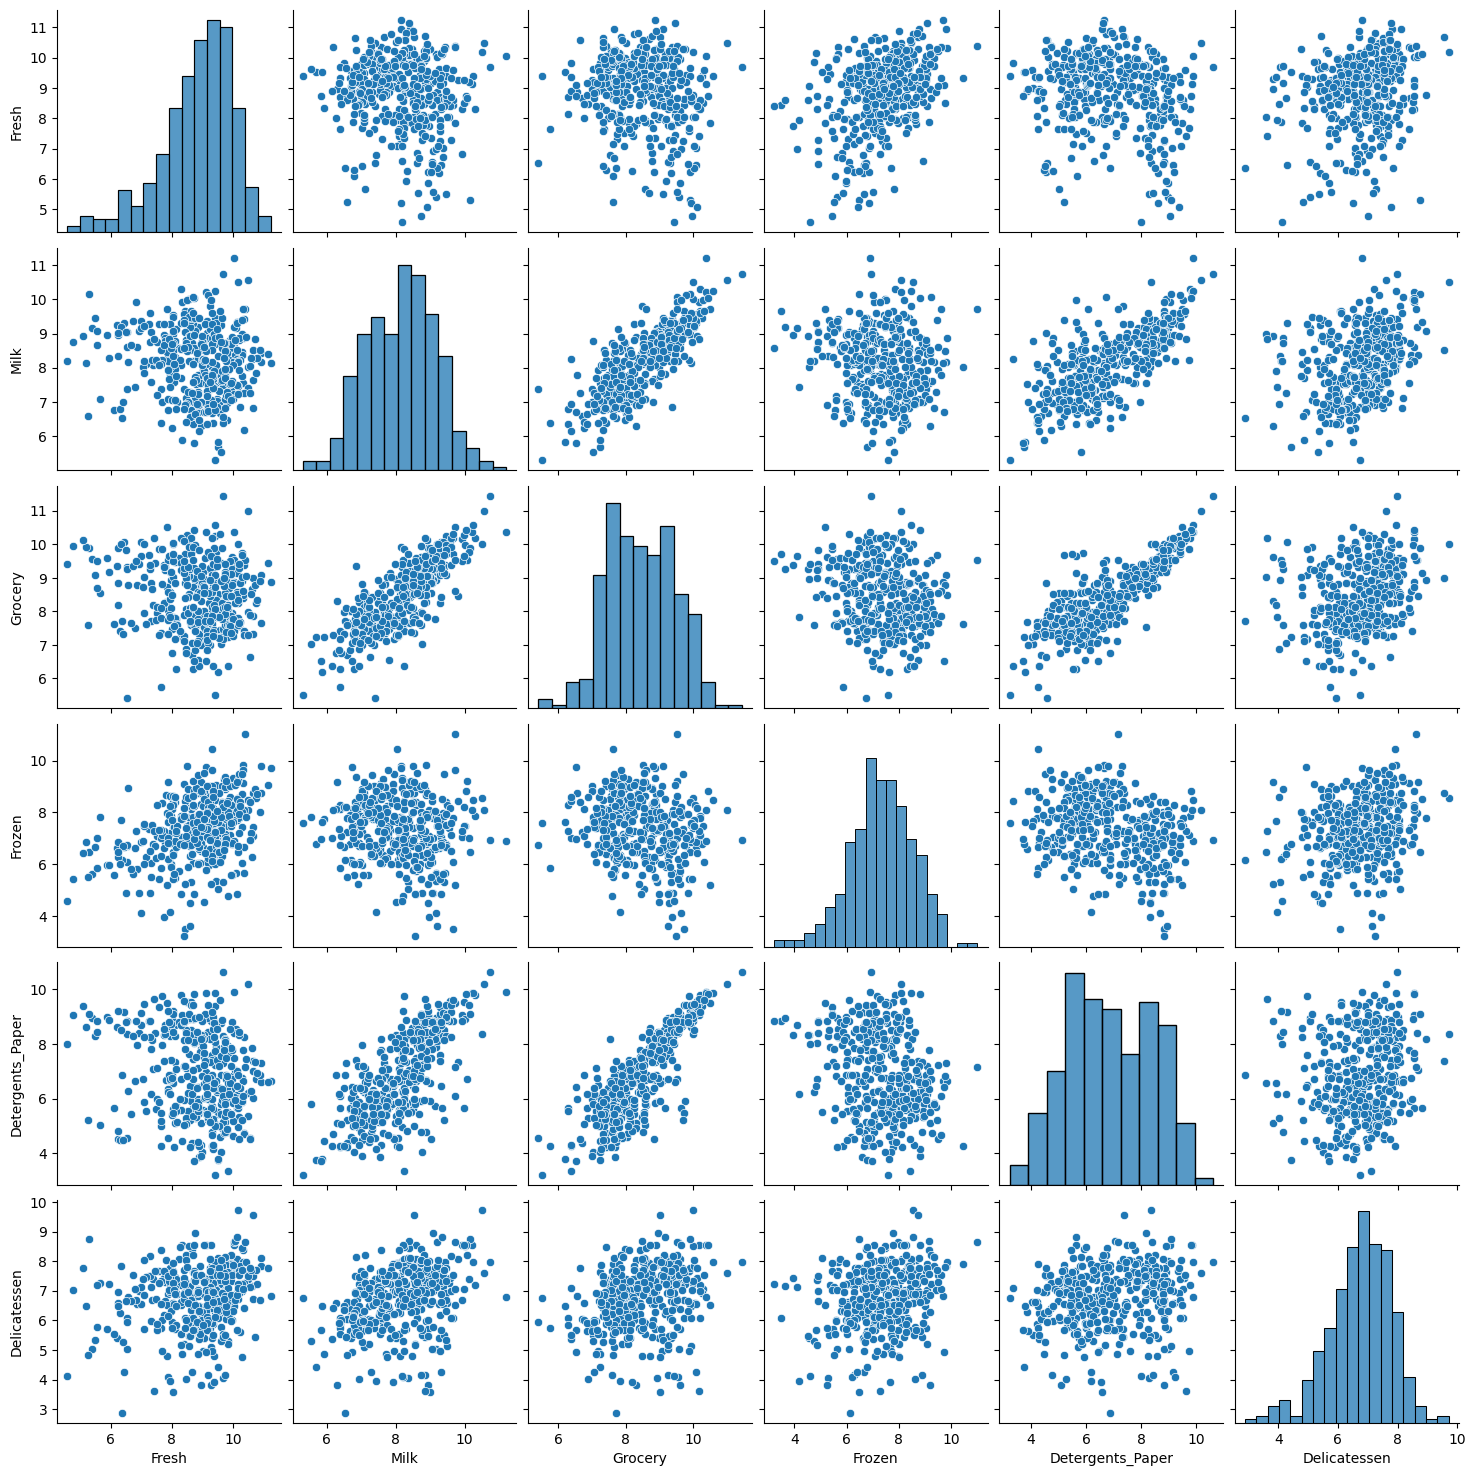

In [91]:
# write your code here
sns.pairplot(df_no_outliers)
plt.show()

11. Check for Correlations using sns.clustermap (2 points)

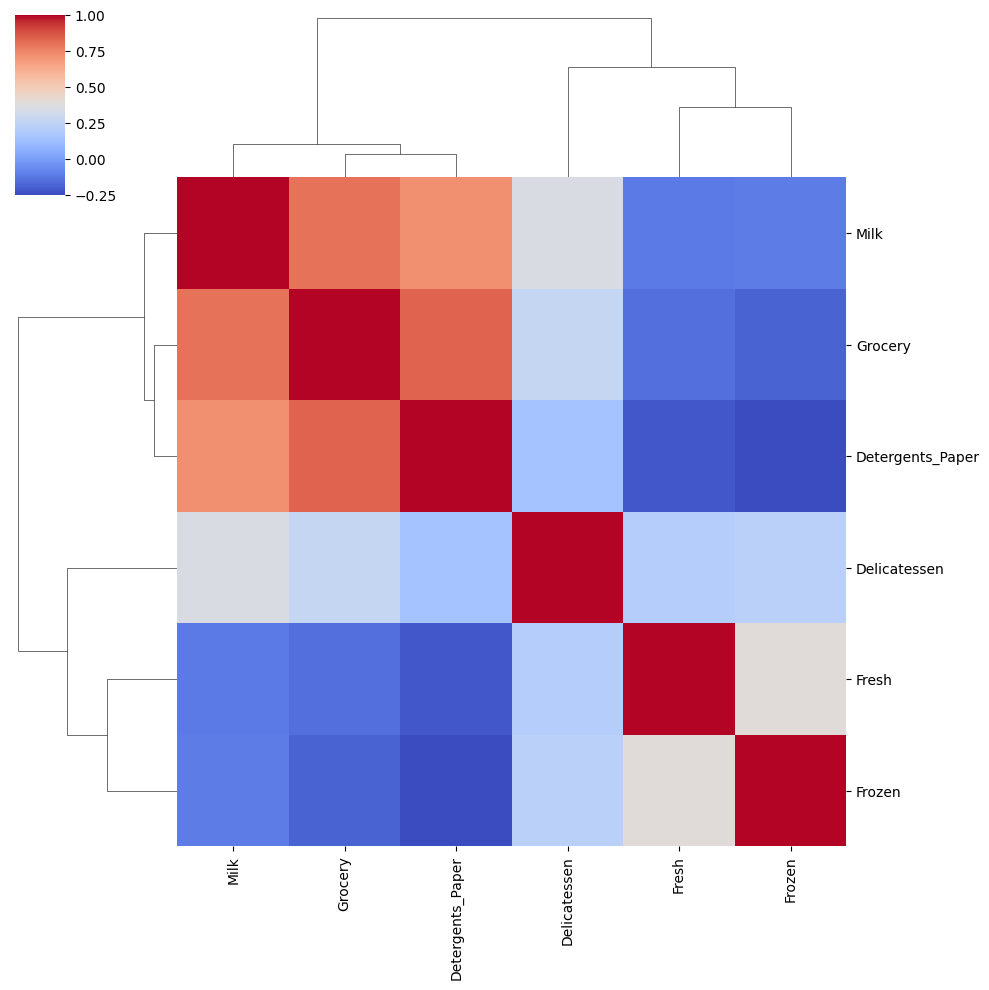

In [92]:
# write your code here
correlation_matrix = df_no_outliers.corr()
sns.clustermap(correlation_matrix, cmap='coolwarm')

12. What do you observe? (2 points)

The clustermap tells us that there is a high level of correlation between the sales of Milk, Grocery and Detergents_paper. That is if someone buys Milk they have a high likelyhood of buying Grocery and/or Detergents_Paper.

### PCA
Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the cleaned data to discover which dimensions about the data best maximize the variance of features involved.

13. Biplot: Visualizing Product Relationships in 2D (2 points)

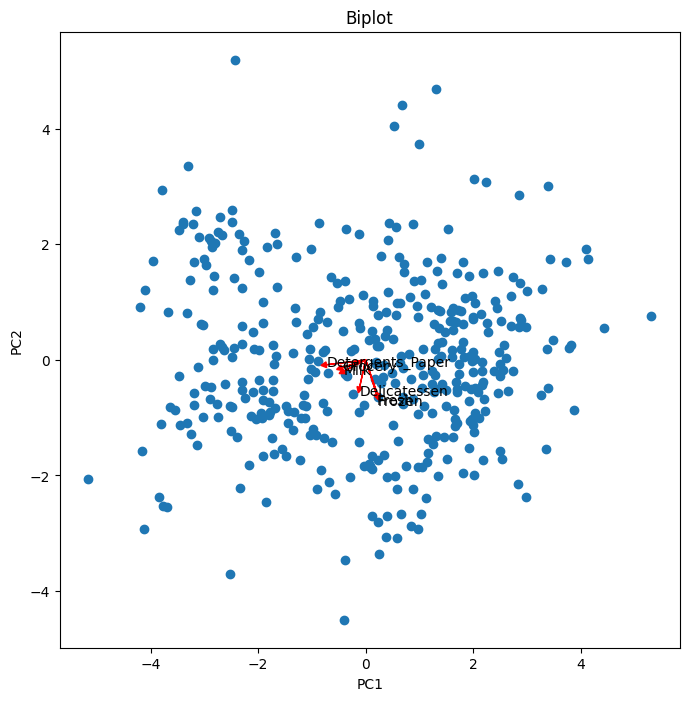

In [93]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_no_outliers.values)
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(pca_result[:, 0], pca_result[:, 1])
feature_names = df_no_outliers.columns
for i, feature in enumerate(feature_names):
    ax.arrow(0, 0, pca.components_[0, i], pca.components_[1, i],
             head_width=0.1, head_length=0.1, fc='r', ec='r')
    ax.text(pca.components_[0, i] * 1, pca.components_[1, i] * 1.3, feature)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Biplot')
plt.show()

14. Use sns.jointplot to plot x and y in the above code (2 points)

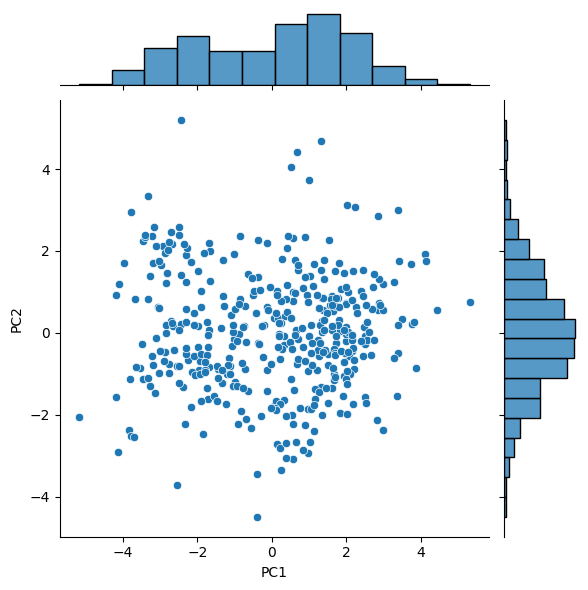

In [94]:
# write your code here
pca_df = pd.DataFrame({'PC1': pca_result[:, 0], 'PC2': pca_result[:, 1]})
sns.jointplot(x='PC1', y='PC2', data=pca_df, kind='scatter')
plt.show()

15. Exploring the new Descriptors of the cleand Data using plot.bar (2 points)

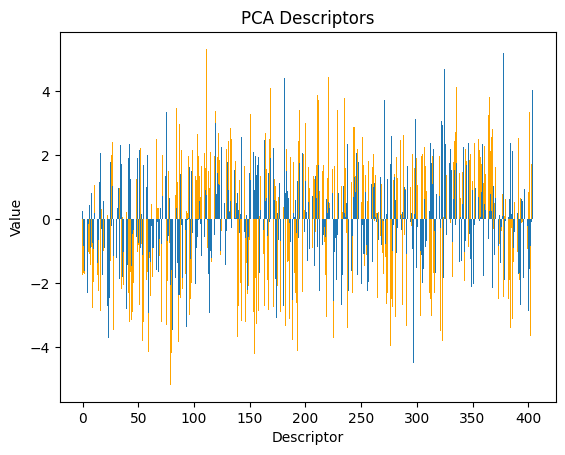

In [99]:
# write your code here
labels = range(len(pca_df['PC1']))
plt.bar(labels, pca_df['PC1'], color='orange')
plt.bar(labels, pca_df['PC2'])
plt.xlabel('Descriptor')
plt.ylabel('Value')
plt.title('PCA Descriptors')
plt.show()

16. How much approximately the first and second features of explain of variance in total? (1 point)



---
## All set

Please make sure you execute each cell before you submit your file; this is important because if your code didn't work on our machine for an unknown reason, it would be better to see the result rather than losing some points or wasting time to contact you to fix this issue.

What to submit:

* Your Jupyter Notebook file.
* Name your file as firstname_lastname_pj_3 .
---